# Car Price Prediction (Linear Regression)

In [1]:
# biblicotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 


import warnings
warnings.filterwarnings('ignore')

# Entendendo os dados

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# valores duplicados
# Linhas duplicadas
if cars.shape[0] != cars.drop_duplicates().shape[0]:
    n_linhas_duplicadas = cars.shape[0] - cars.drop_duplicates().shape[0]
    print(f'Existem {n_linhas_duplicadas} linhas duplicadas')
else:
    print('Não há linhas duplicadas no conjunto de dados.')

Não há linhas duplicadas no conjunto de dados.


In [5]:
# Colunas duplicadas
colunas_duplicadas = []
for col1 in cars.columns.tolist():
    for col2 in cars.columns.tolist():
        if col1 != col2:
            if (cars[col1] == cars[col2]).all():
                colunas_duplicadas.append([col1, col2])
            
if len(colunas_duplicadas) > 0:
    print('Colunas duplicadas:', colunas_duplicadas)
else:
    print('Não há colunas duplicadas no conjunto de dados.')

Não há colunas duplicadas no conjunto de dados.


In [6]:
# Colunas constantes
colunas_constantes = []
for col in cars.columns.tolist():
    if cars[col].nunique() == 1:
        colunas_constantes.append(col)

if len(colunas_constantes) > 0:
    print('Colunas constantes:', colunas_constates)
    cars.drop(colunas_constantes, axis=1, inplace=True)
else:
    print('Não há colunas constantes no conjunto de dados.')

Não há colunas constantes no conjunto de dados.


In [7]:
# função para verificar baixa variância
def identify_cols_low_variance(df, low_variance_threshold):
    # Inicializa scaler
    scaler = MinMaxScaler()
    # Seleciona apenas variáveis numéricas
    df_numericas = df.select_dtypes(exclude=['object'])
    # Faz scaling das variáveis
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_numericas),
        columns=df_numericas.columns
    )
    
    colunas_baixa_variancia = []
    for col in df_scaled.columns:
        if df_scaled[col].var() < low_variance_threshold:
            colunas_baixa_variancia.append(col)
            
    return colunas_baixa_variancia

In [8]:
colunas_baixa_variancia = identify_cols_low_variance(cars, low_variance_threshold=0.001)

if len(colunas_baixa_variancia) > 0:
    print('Colunas com baixa variância:', colunas_baixa_variancia)
    df_train.drop(colunas_baixa_variancia, axis=1, inplace=True)
    
else:
    print('Não há colunas com baixa variância no conjunto de dados.')

Não há colunas com baixa variância no conjunto de dados.


In [9]:
# Checando colunas com nulos
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* Não temos valores nulos 
* não temos 

In [10]:
# verificando o descritivo estatistico básico
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Limpeza de dados e preparação

In [11]:
## Limpeza de dados e preparação
CompanyName = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.insert(3, 'CompanyName', CompanyName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Temos algumas empresas com erros de digitação, vamos tratar:

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw
    

In [13]:
# todos os nomes com escritos com letras maiusculas serão reescritos em letras minusculas
cars['CompanyName'] = cars['CompanyName'].str.lower()

In [14]:
# definimos um dicionário com os nomes que queremos alterar
alteracao= {'maxda':'mazda', 
            'porcshce':'porsche',
            'toyouta':'toyota',
            'vokswagen':'volkswagen',
            'vw':'volkswagen'
           }

# criação de uma função para alterar os nomes automaticamente
def alteracao_nome(a):
    cars['CompanyName'].replace(a, inplace = True)

# chamando a função
alteracao_nome(alteracao)

# verificando o resultado
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Visualização dos dados

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


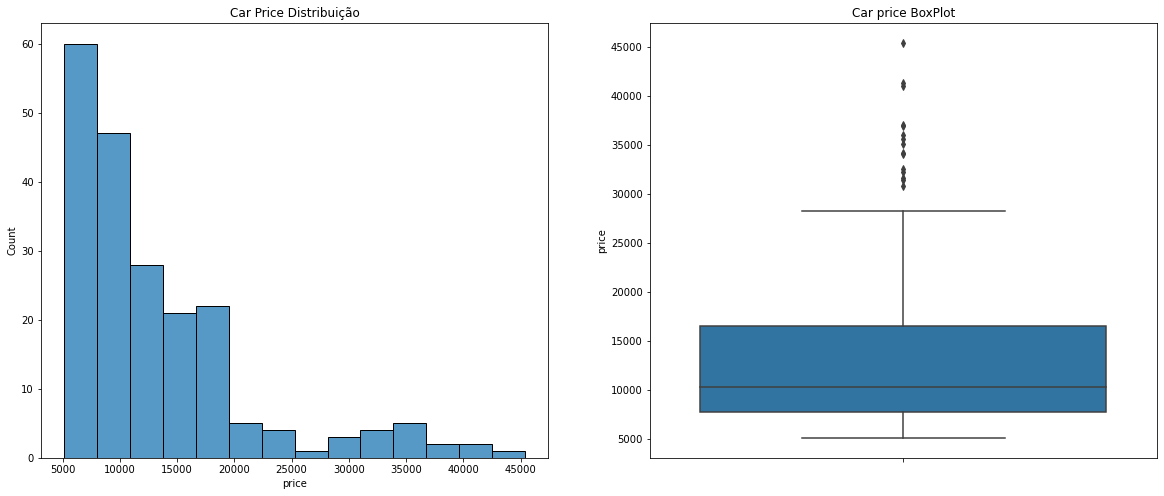

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribuição')
sns.histplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car price BoxPlot')
sns.boxplot(y=cars.price)

print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,1]))

* Podemos ver que o preço do carro está assimétrico a direita.
* Média e Mediana estão com diferença significante
* Temos outliers que influenciam na média. 
                    * 85% dos veículos tem valor até 18500, 
                    * 90% dos veículos tem valor até 22563.40,
                    * 95% tem valor até 32.472.

## Visualizando as variáveis categóricas

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel




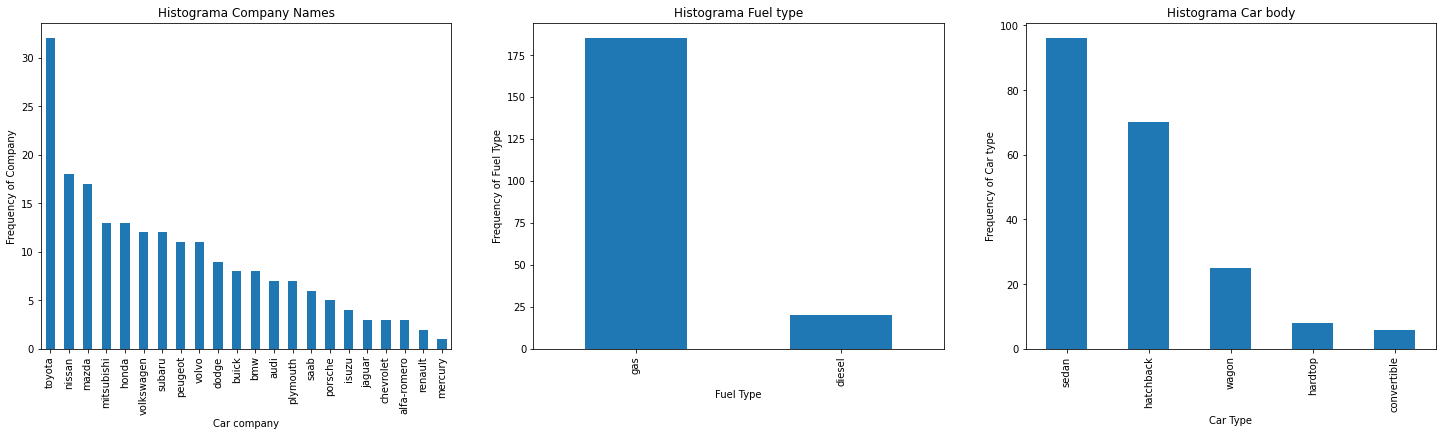

In [17]:
plt.figure(figsize=(25, 6));

plt.subplot(1,3,1)
plt1 = cars['CompanyName'].value_counts().plot(kind='bar')
plt.title('Histograma Company Names')
plt1.set(xlabel='Car company', ylabel='Frequency of Company');
           
plt.subplot(1,3,2)
plt1 = cars['fueltype'].value_counts().plot(kind='bar')
plt.title('Histograma Fuel type')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of Fuel Type');

plt.subplot(1,3,3)
plt1 = cars['carbody'].value_counts().plot(kind='bar')
plt.title('Histograma Car body')
plt1.set(xlabel='Car Type', ylabel = 'Frequency of Car type');

plt.show();

* Toyota é a marca mais vendida
* carros a gasolina são os preferidos
* carros sedan vendem mais que os outros modelos

<AxesSubplot:title={'center':'Hitograma Symboling'}, xlabel='symboling', ylabel='price'>

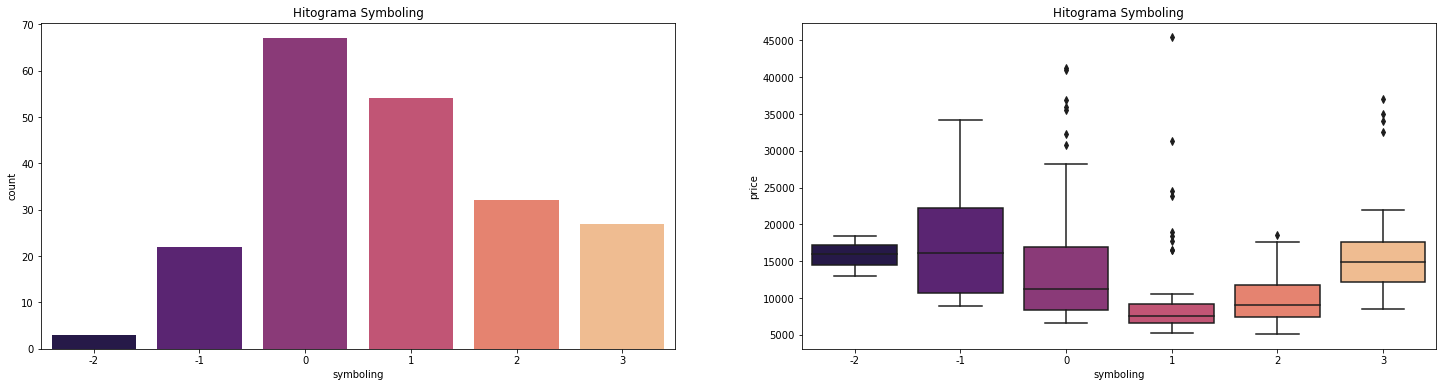

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.title('Hitograma Symboling')
sns.countplot(cars['symboling'], palette=('magma'))

plt.subplot(1,2,2)
plt.title('Hitograma Symboling')
sns.boxplot(x=cars['symboling'], y=cars['price'], palette=('magma'))

* os carros mais vendidos aparecem em 0 e 1, as colunas são maiores que as outras


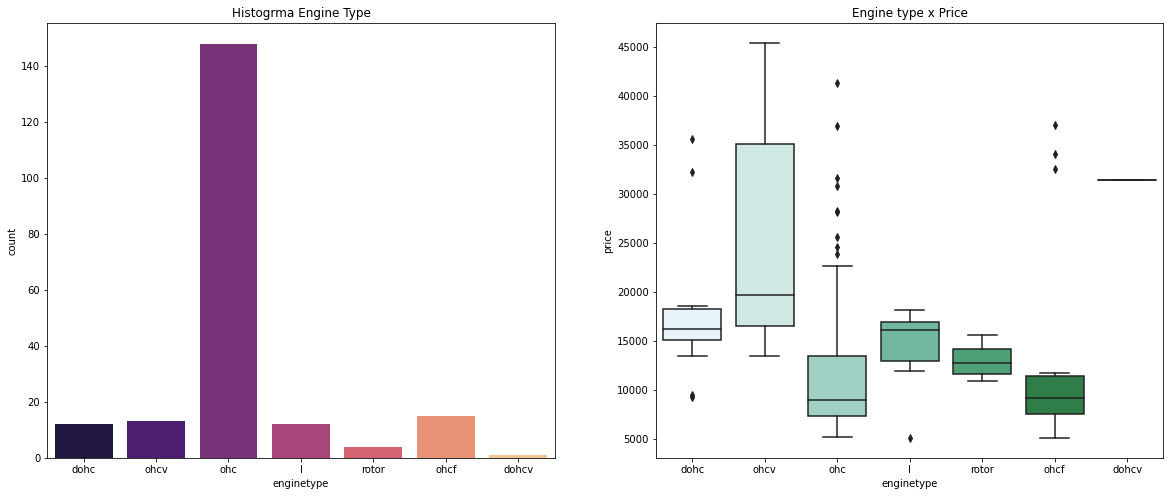

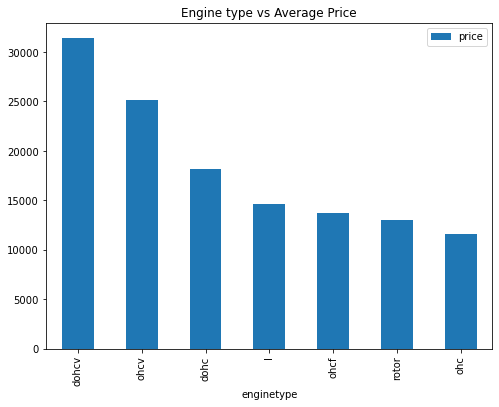

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogrma Engine Type')
sns.countplot(cars['enginetype'], palette=('magma'))

plt.subplot(1,2,2)
plt.title('Engine type x Price')
sns.boxplot(x=cars['enginetype'], y=cars['price'], palette=('BuGn'))

data = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
data.plot.bar(figsize=(8,6))
plt.title('Engine type vs Average Price')
plt.show()

* OHC é o motor preferido
* OHCV é o motor com maior preço
* OHC e OHCF tem o menor preço
* DOHCV tem o maior preço médio

<Figure size 1800x432 with 0 Axes>

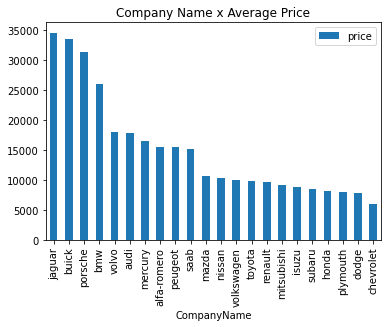

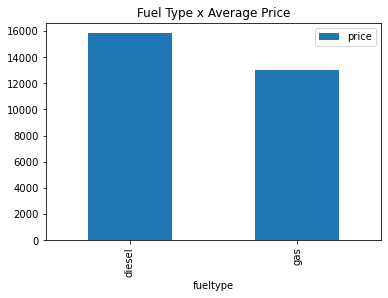

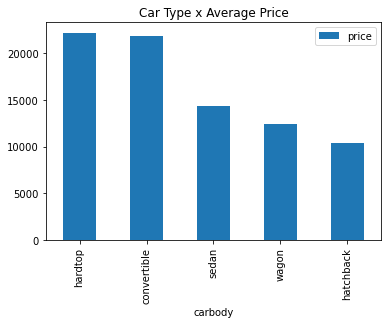

In [20]:
plt.figure(figsize=(25,6))

data = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
data.plot(kind='bar')
plt.title('Company Name x Average Price')
plt.show();
                    
data = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
data.plot(kind='bar')
plt.title('Fuel Type x Average Price')
plt.show();

data = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
data.plot(kind='bar')
plt.title('Car Type x Average Price')
plt.show();

* a marca mais com maior preço médio é Jaguar
* os veículos à diesel tem maior preço médio
* os veículos com não conversíve e conversível tem preço médio similar


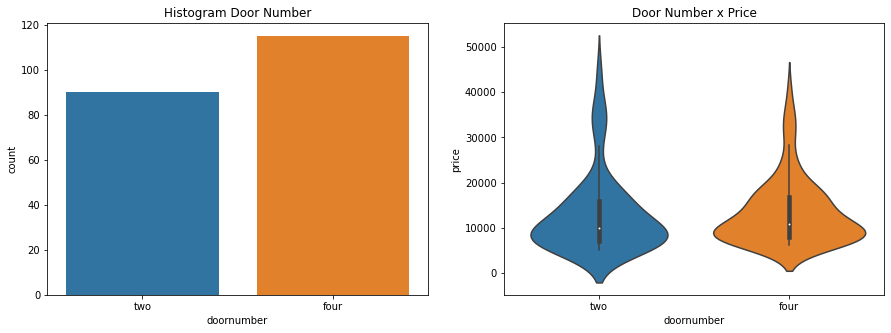

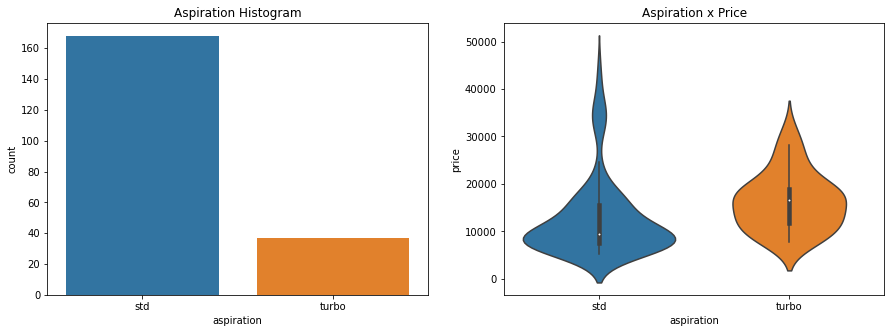

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Door Number')
sns.countplot(cars['doornumber'])

plt.subplot(1,2,2)
plt.title('Door Number x Price')
sns.violinplot(x=cars['doornumber'], y=cars['price'])
plt.show();

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars['aspiration'])

plt.subplot(1,2,2)
plt.title('Aspiration x Price')
sns.violinplot(x=cars['aspiration'], y=cars['price'])
plt.show();


* os carros 4 portas são mais vendidos
* não há muita diferença entre o preço médio para os carros de 2 e 4 portas
* os veículos com motores normal são mais vendidos que os veículos com motor turbo
* o preço médio mostra que os veículos com motores std são mais baratos que os veículos com motor turbo

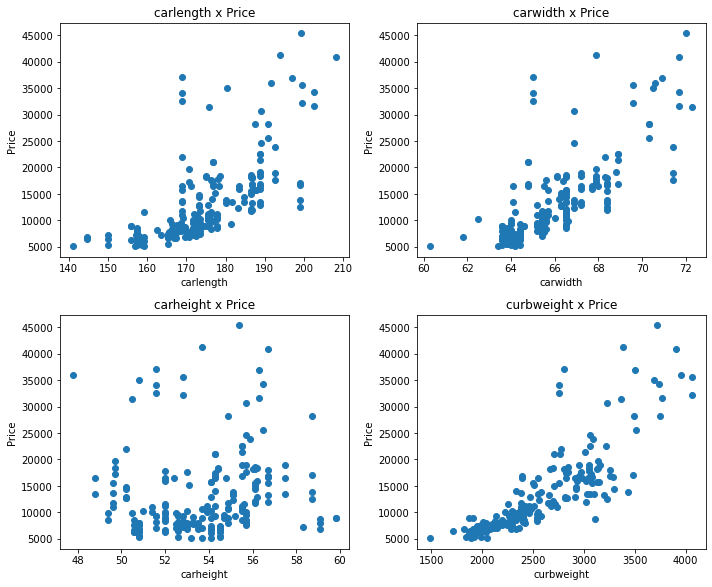

In [22]:
def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' x Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


* carheight não tem correlação com o preço
* correlação positiviva com o preço, carlenght, carwidth, curbweight

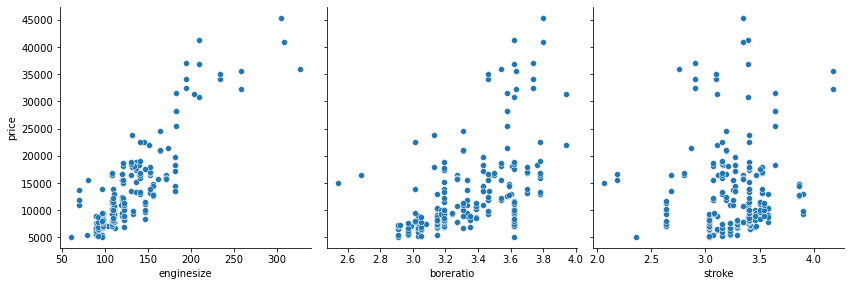

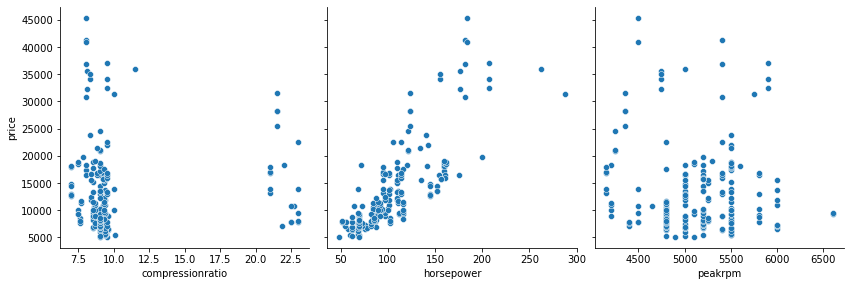

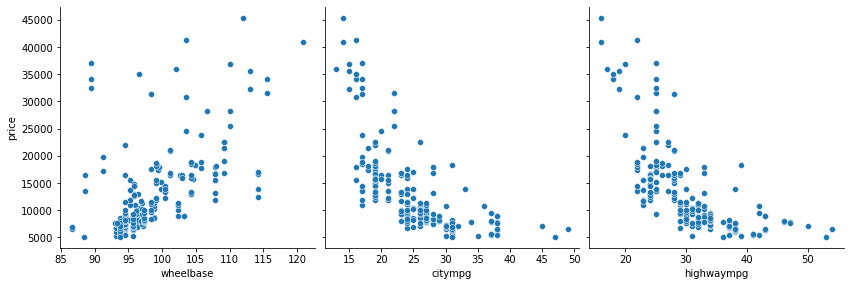

In [23]:
def correlacao(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price', size=4, kind='scatter')
    plt.show();

correlacao('enginesize', 'boreratio', 'stroke')
correlacao('compressionratio', 'horsepower', 'peakrpm')
correlacao('wheelbase', 'citympg', 'highwaympg')


* Correlação positiva - enginesize, boreratio, horsepower, wheelbase
* correlação negativa - citympg, highwaympg

## Criando novas variáveis

In [24]:
# economia de combustível
cars['fueleconomy'] = (0.55 * cars['citympg'] + (0.45 * cars['highwaympg']))

In [25]:
# Criando um range e verificando o preço médio de cada compania (baixo, médio, alto)
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins ,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


## Analise bivariada

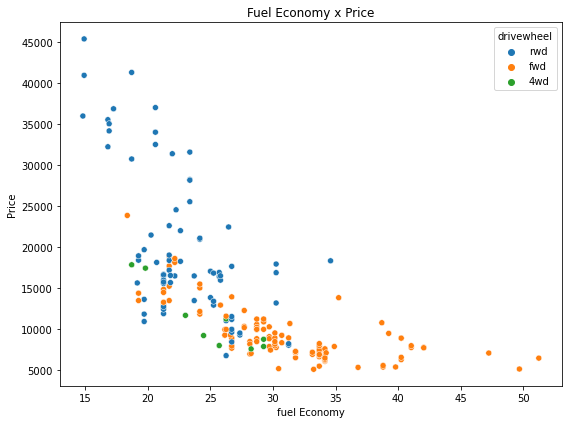

In [26]:
plt.figure(figsize=(8,6))

plt.title('Fuel Economy x Price')
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'], hue=cars['drivewheel'])
plt.xlabel('fuel Economy')
plt.ylabel('Price')

plt.tight_layout()
plt.show();

* correlação negativa entre economia de combustível e preço.

<Figure size 1800x432 with 0 Axes>

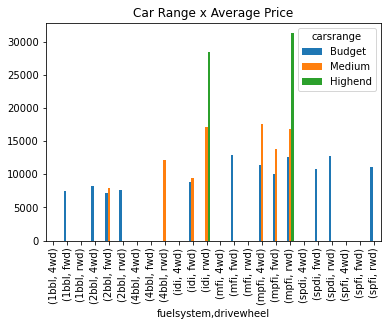

In [27]:
plt.figure(figsize=(25,6))

data = pd.DataFrame(cars.groupby(['fuelsystem', 'drivewheel', 'carsrange'])['price'].mean().unstack(fill_value=0))
data.plot(kind='bar')
plt.title('Car Range x Average Price')
plt.show();

* carro preferido tem motor idi ou mpfi e tração trazeira.

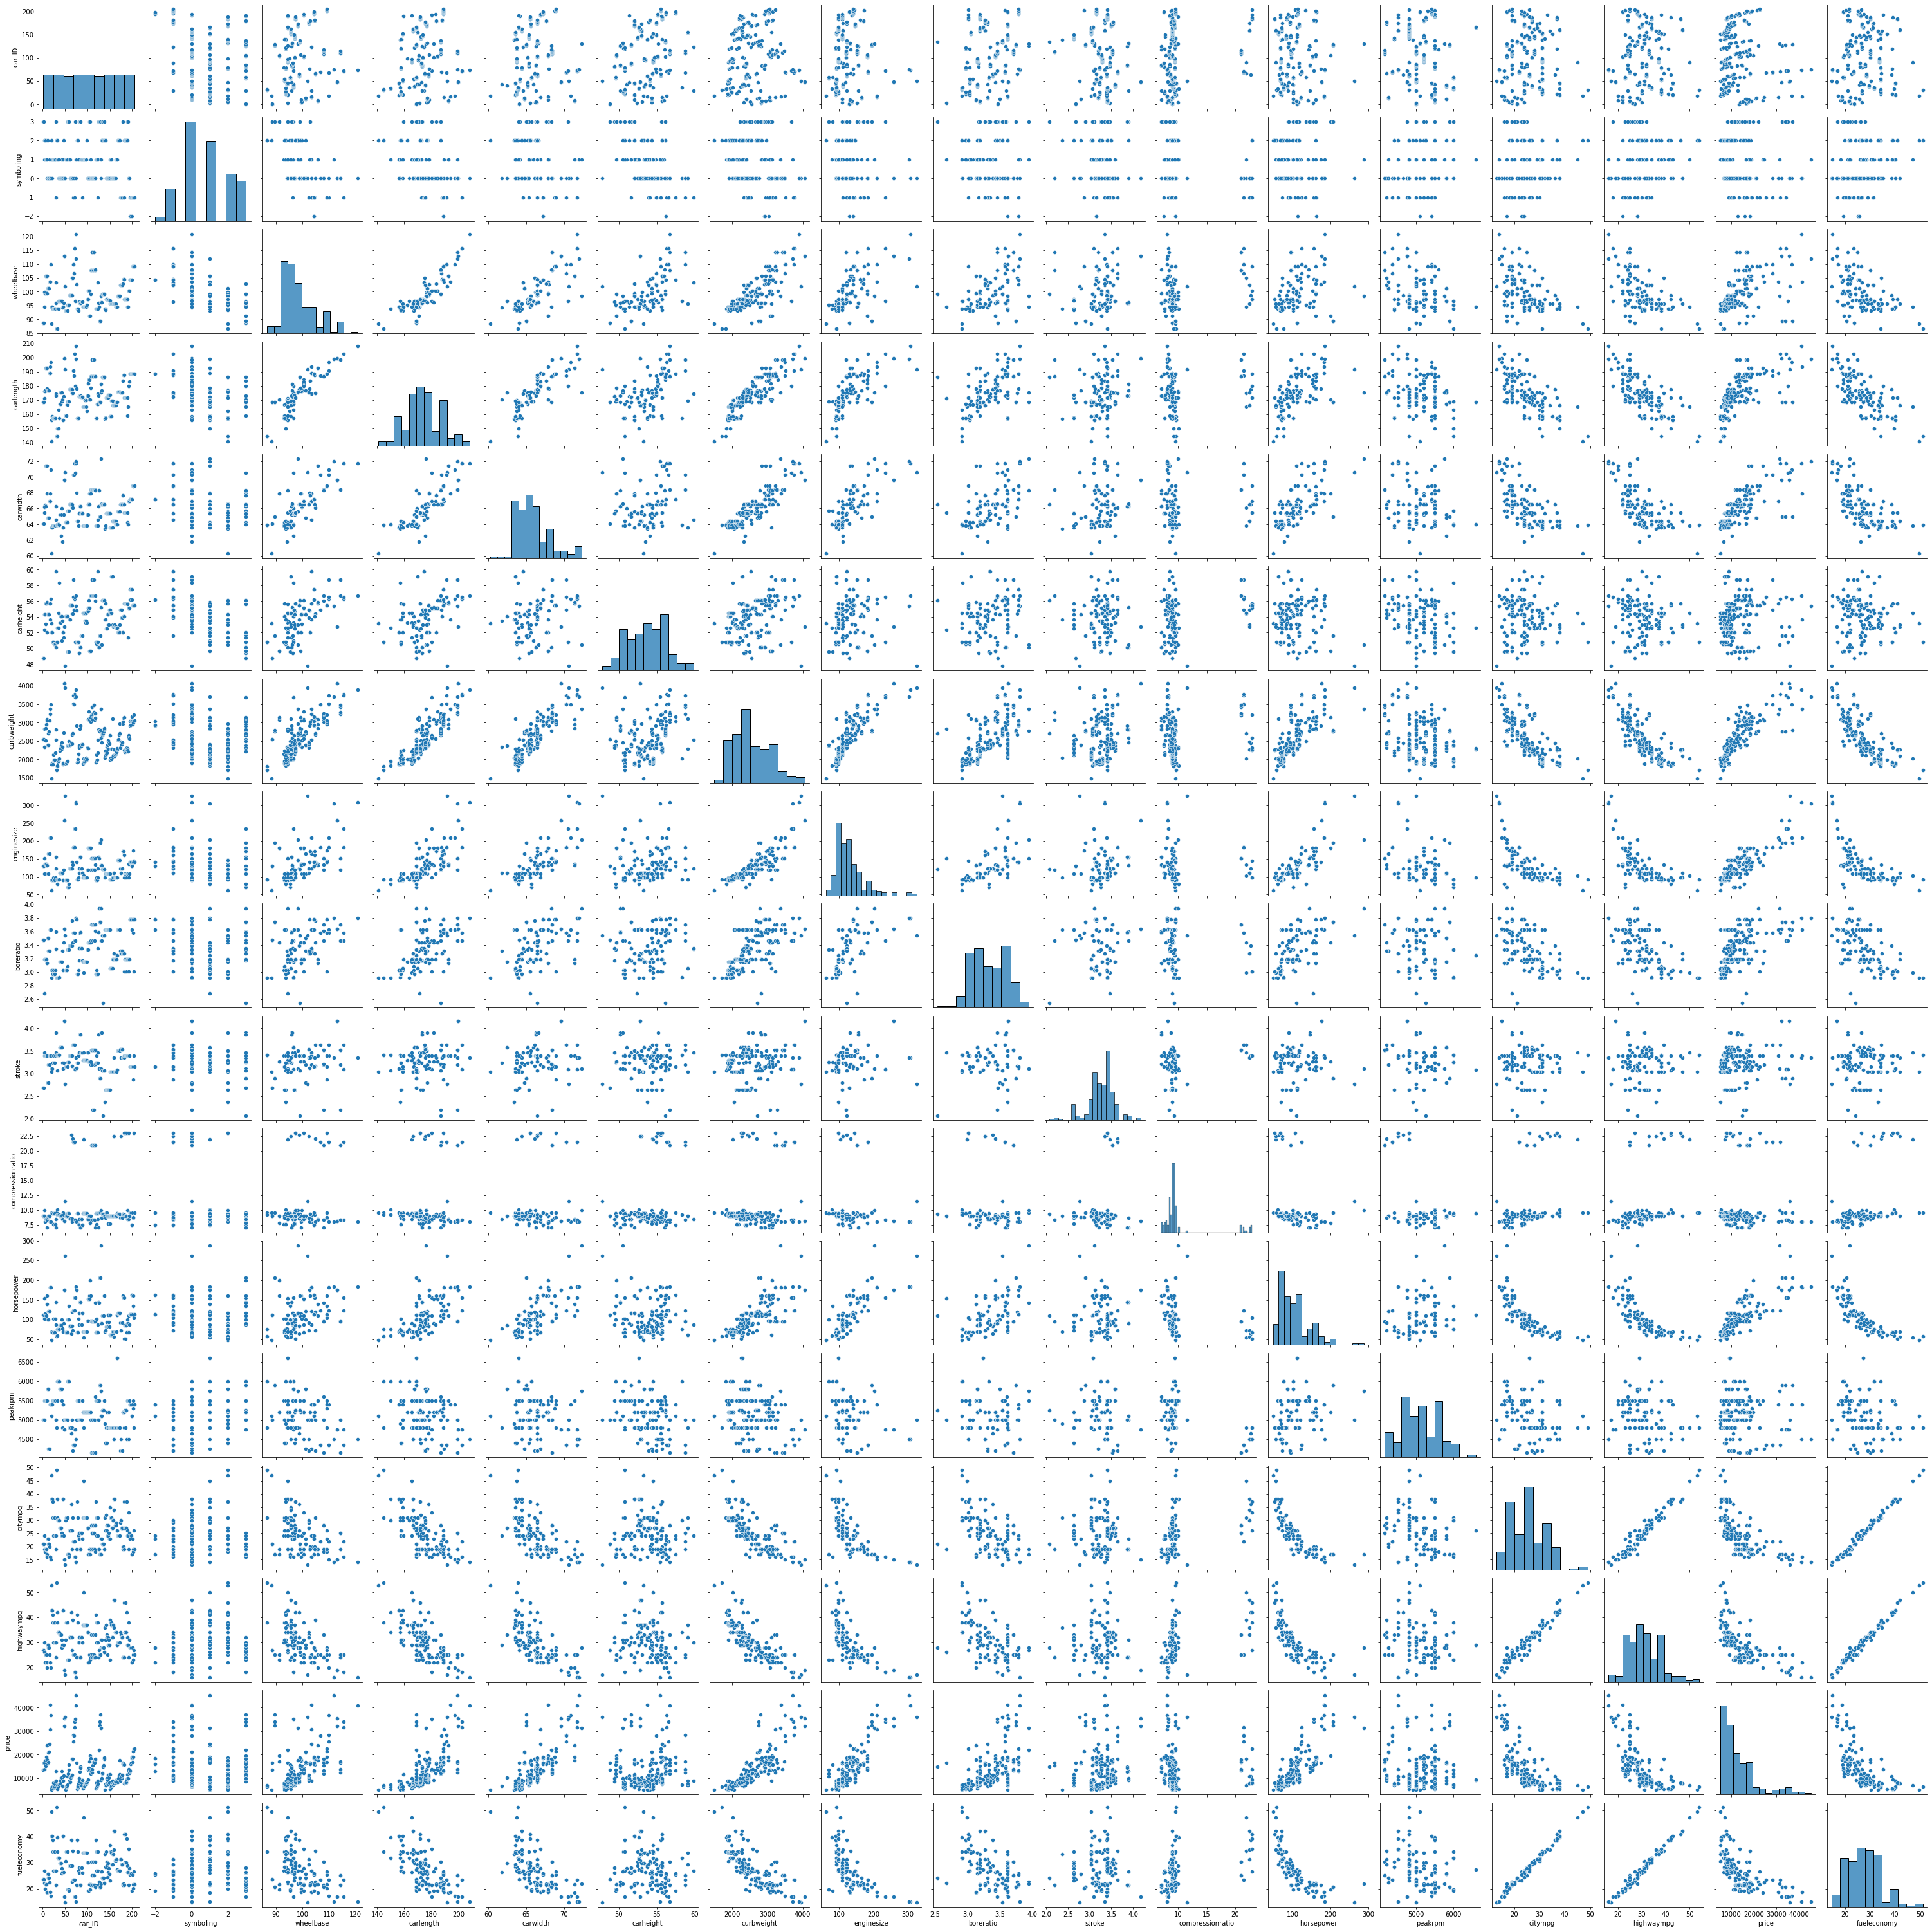

In [28]:
sns.pairplot(cars)

In [29]:
cars_lr = cars.drop(["car_ID", "symboling", "CompanyName"], axis=1, inplace=True)
cars_lr 

In [30]:
cars_lr = cars

In [31]:
cars_lr

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Medium
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Medium


In [32]:
# variáveis que serão utilizadas para previsão
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]

## Transformando as colunas categóricas(get_dummies)

In [33]:



# função dummie
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# aplicando a função

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [34]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,...,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,...,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,...,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
cars.shape

(205, 25)

## Separando em treino e teste

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 
            'boreratio', 'horsepower','fueleconomy',
            'carlength','carwidth','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [39]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

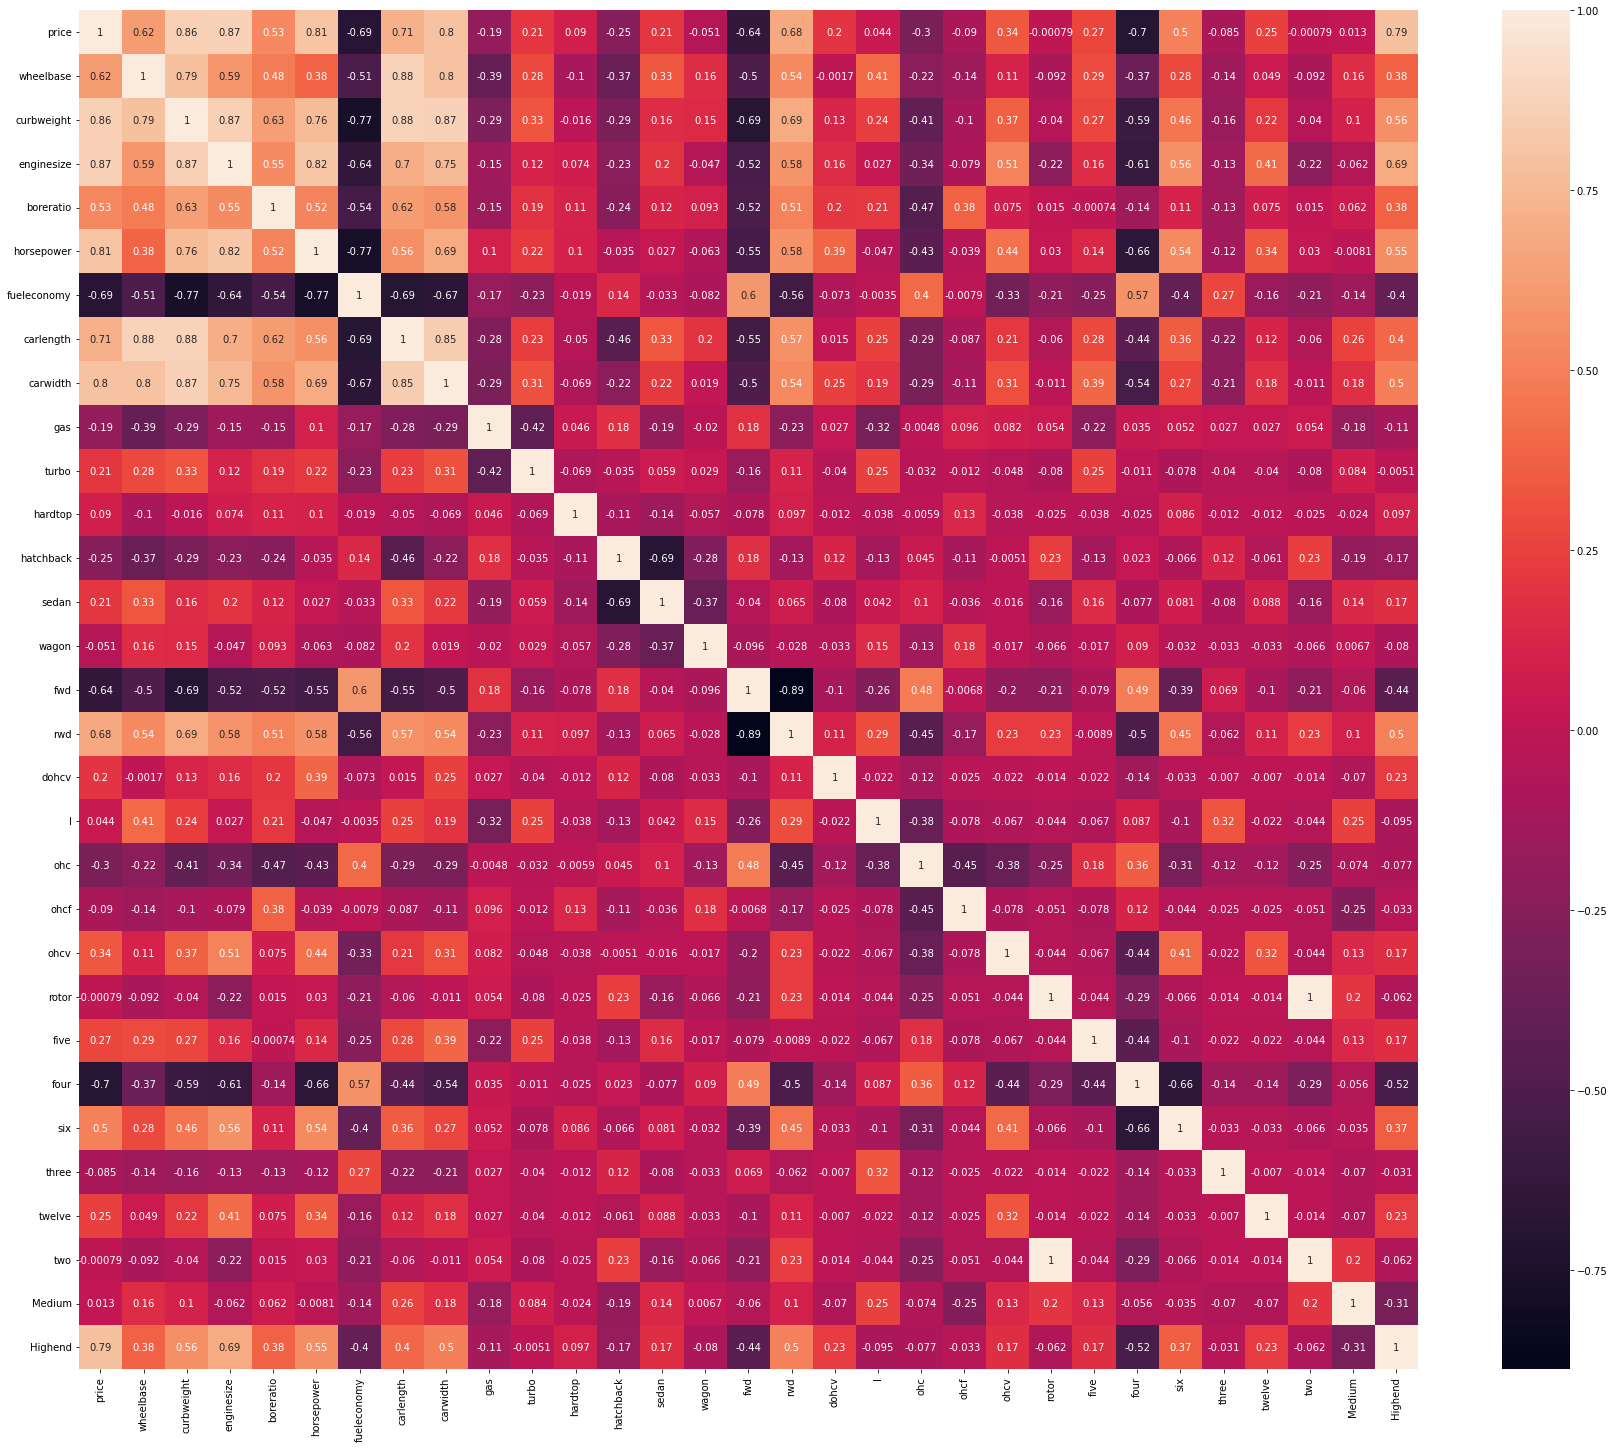

In [40]:
# correlação 
plt.figure(figsize = (30,25))
sns.heatmap(df_train.corr(), annot=True)

In [41]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
ref = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [44]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

## Building model usando statsmodel

In [45]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [46]:
def construcao_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [47]:
# modelo 1

novo_X_train = construcao_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.29e-70
Time:                        15:38:06   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

In [48]:
novo_X_train = X_train_rfe.drop(['twelve'], axis=1)

In [49]:
# Modelo 2

novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.25e-71
Time:                        15:38:06   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [50]:
novo_X_train = novo_X_train.drop(['fueleconomy'], axis=1)

In [51]:
# Modelo 3

novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           7.85e-72
Time:                        15:38:06   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [52]:
#Calculating the Variance Inflation Factor
checkVIF(novo_X_train)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [53]:
novo_X_train = novo_X_train.drop(['curbweight'], axis=1)

In [54]:
# Modelo 4
novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.70e-70
Time:                        15:38:06   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [55]:
#Calculating the Variance Inflation Factor
checkVIF(novo_X_train)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [56]:
novo_X_train = novo_X_train.drop(['sedan'], axis=1)

In [57]:
# modelo 5
novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.68e-69
Time:                        15:38:06   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [58]:
checkVIF(novo_X_train)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [61]:
novo_X_train = novo_X_train.drop(["wagon"], axis = 1)

In [62]:
# modelo 6
novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.57e-70
Time:                        15:38:29   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [63]:
checkVIF(novo_X_train)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [64]:
# Modelo 7

novo_X_train = novo_X_train.drop(["dohcv"], axis = 1)
novo_X_train = construcao_model(novo_X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.04e-67
Time:                        15:40:15   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [65]:
checkVIF(novo_X_train)

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


## Analise dos Residuos do Modelo

In [66]:
lm = sm.OLS(y_train, novo_X_train).fit()
y_train_price = lm.predict(novo_X_train)

Text(0.5, 0, 'Errors')

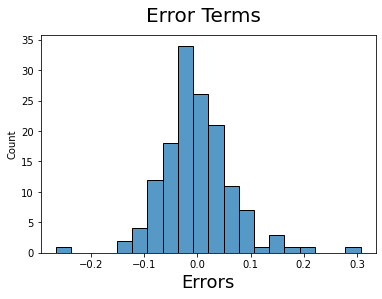

In [67]:
# histograma de erros 
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

* o gráfico mostra uma aproximação de um normalização

## Prevendo e avaliando


In [68]:
# definindo a variavel teste

num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 
            'horsepower','fueleconomy','carlength','carwidth','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [69]:
# dividingo em X e y

y_test = df_test.pop('price')
X_test = df_test

In [70]:
# modelo de previsão
novo_X_train = novo_X_train.drop('const', axis =1)

# criando novo_X_train dataframe deletando variaveis de X_test
novo_X_train = X_test[novo_X_train.columns]

# adicionando variavel constante
novo_X_train = sm.add_constant(novo_X_train)

In [71]:
# fazendo a previsão
y_pred = lm.predict(novo_X_train)

## Avaliando e comparando o y_pred e y_test

In [72]:
r2_score(y_test, y_pred)

0.8614595209022033

Text(0, 0.5, 'y_pred')

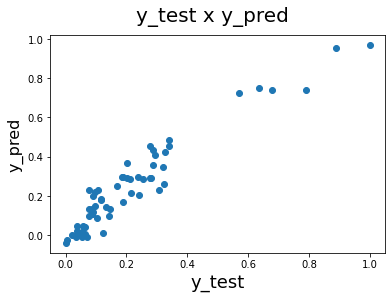

In [73]:
# avaliando o modelo
# plotando y_test and y_pred para enteneder a propagação(spread)

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test x y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize=16)

## avaliação do modelo usando Statismodel

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.04e-67
Time:                        15:56:18   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [ ]:
* R2 - 89.9
p-values - features abaixo de 0,05.
* 